In [1]:
"""
 Node 1: u_0 <= .79066500
   Node 2: y_0 <= -.30678500
     Node 4: y_1-mean = -.37739280
   Node 2: y_0 > -.30678500 or NA
     Node 5: y_1-mean = .68262349E-01
 Node 1: u_0 > .79066500 or NA
   Node 3: y_1-mean = .38154653

"""

'\nNode 1: y_0 <= -.45903500E-02\n   Node 2: y_0 <= -.22948500\n     Node 4: y_1-mean = -.36188186\n   Node 2: y_0 > -.22948500 or NA\n     Node 5: y_1-mean = -.12265689\n Node 1: y_0 > -.45903500E-02 or NA\n   Node 3: u_0 <= .65806000\n     Node 6: y_1-mean = .16258794\n   Node 3: u_0 > .65806000 or NA\n     Node 7: y_1-mean = .34599850\n'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [51]:
data = pd.read_csv("train_data.csv", sep=",")
points = data.iloc[:,1:3]
mypoints = points.to_numpy()
xminimum = mypoints[:,0].min()
xmaximum = mypoints[:,0].max()
yminimum = mypoints[:,1].min()
ymaximum = mypoints[:,1].max()
values = data.iloc[:,3].to_numpy()

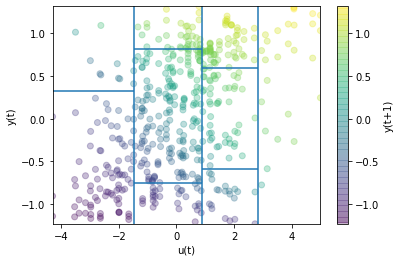

In [63]:
# Syntax: plt.axis([xmin, xmax, ymin, ymax])
plt.axis([xminimum, xmaximum, yminimum, ymaximum])
plt.scatter(mypoints[:,0], mypoints[:,1], c=values, alpha=0.3)
#parallel zur y-Achse, Split an u_0
plt.vlines(x=2.84, ymin=yminimum, ymax=ymaximum)
#plt.vlines(x=3.33, ymin=yminimum, ymax=ymaximum)
plt.vlines(x=-1.46, ymin=yminimum, ymax=ymaximum)
plt.vlines(x=0.8858, ymin=yminimum, ymax=ymaximum)
#plt.vlines(x=-2.06, ymin=yminimum, ymax=0.3253)
#plt.vlines(x=-2.99, ymin=yminimum, ymax=0.3253)
#plt.vlines(x=-0.6305, ymin=-0.7542, ymax=0.5294)
#plt.vlines(x=1.42, ymin=-0.5923, ymax=0.5929)

#parallel zur x-Achse, Split an y_0
plt.hlines(y=0.3253, xmin=xminimum, xmax=-1.46)
plt.hlines(y=0.8115, xmin=-1.46, xmax=0.8858)
plt.hlines(y=-0.7542, xmin=-1.46, xmax=0.8858)
#plt.hlines(y=0.5294, xmin=-1.46, xmax=0.8858)
plt.hlines(y=-0.5923, xmin=0.8858, xmax=2.84)
#plt.hlines(y=-0.9631, xmin=0.8858, xmax=2.84)
plt.hlines(y=0.5929, xmin=0.8858, xmax=2.84)

plt.xlabel("u(t)")
plt.ylabel("y(t)")
cbar = plt.colorbar()
cbar.set_label('y(t+1)')
plt.savefig('partition2d.pdf')

In [ ]:
plt.axhline(y=0.3253, xmin=xminimum, xmax=-1.46)


pred = pd.read_csv("predictions.csv", sep=" ", header=None)
pred = pred.transpose()
pred.columns = ["y_dach"]



data = pd.read_csv("test_data.csv", index_col=0, sep=",")
# create 2d x,y grid (both X and Y will be 2d)
X, Y = np.meshgrid(x, y)

# repeat Z to make it a 2d grid
Z = np.tile(z, (len(z), 1))

fig, ax = plt.subplots(1, figsize=(20, 18))

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='ocean')

# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(0.01)